In [ ]:
# Importing Libraries
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
# Get the stock quote
dataset = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2018-12-31')
# show the data
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064


In [ ]:
dataset.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2012-01-03 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1760 non-null   float64
 1   Low        1760 non-null   float64
 2   Open       1760 non-null   float64
 3   Close      1760 non-null   float64
 4   Volume     1760 non-null   float64
 5   Adj Close  1760 non-null   float64
dtypes: float64(6)
memory usage: 96.2 KB


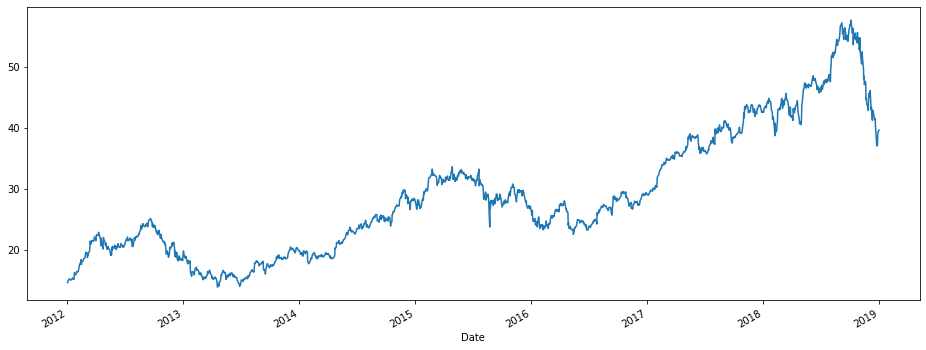

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
# 7 Day rolling mean
dataset.rolling(7).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,15.025918,14.858827,14.939847,14.962347,288444400.0,12.907281
2012-01-12,15.078980,14.908572,15.005561,15.014184,275639600.0,12.951999
2012-01-13,15.108418,14.956429,15.055051,15.046684,270782400.0,12.980036


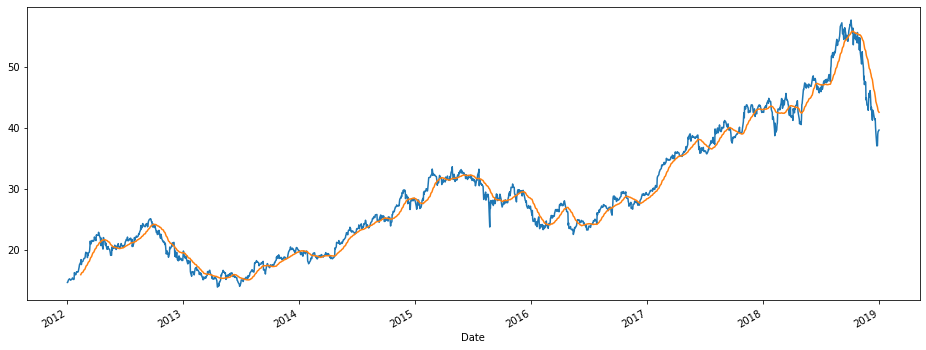

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

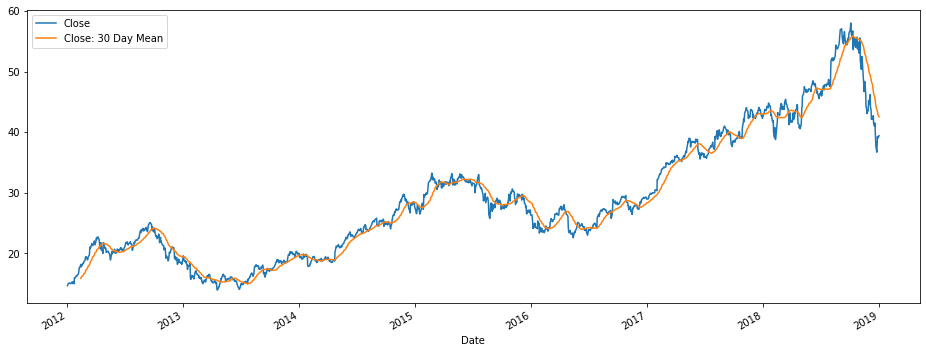

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
dataset.isna().any()

High                  False
Low                   False
Open                  False
Close                 False
Volume                False
Adj Close             False
Close: 30 Day Mean     True
dtype: bool

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(len(training_set_scaled))

1760


In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM Layer
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding a third LSTM Layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM Layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output Layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

# Fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs = 1000, batch_size= 32)

Epoch 1/1000
54/54 [==============================] - 12s 109ms/step - loss: 0.0425
Epoch 2/1000
54/54 [==============================] - 6s 115ms/step - loss: 0.0038
Epoch 3/1000
54/54 [==============================] - 6s 117ms/step - loss: 0.0029
Epoch 4/1000
54/54 [==============================] - 6s 114ms/step - loss: 0.0031
Epoch 5/1000
54/54 [==============================] - 6s 115ms/step - loss: 0.0040
Epoch 6/1000
54/54 [==============================] - 6s 117ms/step - loss: 0.0025
Epoch 7/1000
54/54 [==============================] - 6s 116ms/step - loss: 0.0019
Epoch 8/1000
54/54 [==============================] - 6s 114ms/step - loss: 0.0025
Epoch 9/1000
54/54 [==============================] - 6s 114ms/step - loss: 0.0023
Epoch 10/1000
54/54 [==============================] - 6s 114ms/step - loss: 0.0019
Epoch 11/1000
54/54 [==============================] - 6s 114ms/step - loss: 0.0020
Epoch 12/1000
54/54 [==============================] - 6s 115ms/step - loss: 0.0020


In [ ]:
# Making the predictions and visualizing the results

# Getting the real stock price of 2020
dataset_test = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2019-12-30')

In [ ]:
real_stock_price = dataset_test.values#.iloc[: 1:2].values
real_stock_price

array([[38.72249985],
       [35.99499893],
       [36.13249969],
       [37.17499924],
       [37.38999939],
       [37.82249832],
       [38.125     ],
       [38.22000122],
       [37.71250153],
       [37.56750107],
       [38.27000046],
       [38.54999924],
       [39.375     ],
       [39.10250092],
       [38.53749847],
       [38.52750015],
       [38.86999893],
       [38.94749832],
       [39.0625    ],
       [40.8125    ],
       [41.52750015],
       [41.74000168],
       [41.85250092],
       [43.21500015],
       [43.66249847],
       [43.09999847],
       [42.24750137],
       [42.76250076],
       [42.52500153],
       [42.84749985],
       [42.42750168],
       [42.8125    ],
       [42.42750168],
       [42.79750061],
       [42.95000076],
       [42.89500046],
       [43.54000092],
       [43.42750168],
       [43.30250168],
       [43.58000183],
       [43.56999969],
       [43.92250061],
       [43.98500061],
       [43.66749954],
       [43.46749878],
       [42

In [ ]:
dataset_test.head()

,Open
Date,
2019-01-02,38.722500
2019-01-03,35.994999
2019-01-04,36.132500
2019-01-07,37.174999
2019-01-08,37.389999


In [ ]:
dataset_test = dataset_test['Open']
dataset_test=pd.DataFrame(dataset_test)
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
test_set = dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
# Getting the predicted stock price of 2020
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 300):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


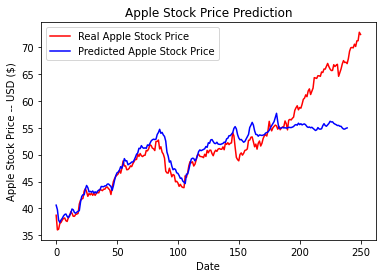

In [ ]:
# Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price -- USD ($)')
plt.legend()
plt.show()